In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

from scipy.stats import kendalltau
from scipy.special import comb
import math


In [48]:
def filter_dates(df):
    ''' Filter for tweets between March 3, 2020 and May 25, 2020. '''
    
    dates = []
    try:
        for date in df["date"]:
            temp = datetime.datetime.strptime(date, "%Y-%m-%d")
            dates.append(temp.date())
        
        df["date"] = dates
        df = df[df["date"] <= datetime.date(2020,5,25)]
        df = df[df["date"] >= datetime.date(2020,3,1)]
    except:
        dates = df["created_at"]
        dates = [date[4:10] + " " + date[-4:] for date in dates]

        for i in range(len(dates)):
            temp = datetime.datetime.strptime(dates[i], "%b %d %Y")
            dates[i] = temp.date()

        # reassigned back to df

        df["date"] = dates
        df = df[df["date"] <= datetime.date(2020,5,25)]
        df = df[df["date"] >= datetime.date(2020,3,1)]
        df = df.drop("created_at", axis=1)

    return df

In [55]:
fake  = glob.glob('*.csv')
fake

['cmu_fake_hydrated.csv',
 'covid_lies_hydrated.csv',
 'detection_fake.csv',
 'Fake_Tweets.csv',
 'misinformation_fake_hydrated.csv']

In [50]:
dates = []
for path in fake:
    df = pd.read_csv(path)
    df = filter_dates(df)
    date = df.sort_values("date", ascending=True)["date"].value_counts()
    dates.append(date)

In [56]:
path = fake[1]
df = pd.read_csv(path)
df = filter_dates(df)
lies =  df.sort_values("date", ascending=True)["date"].value_counts()
# all dates for covid_lies occur on March first... can't use 
plt.plot(lies.sort_index())

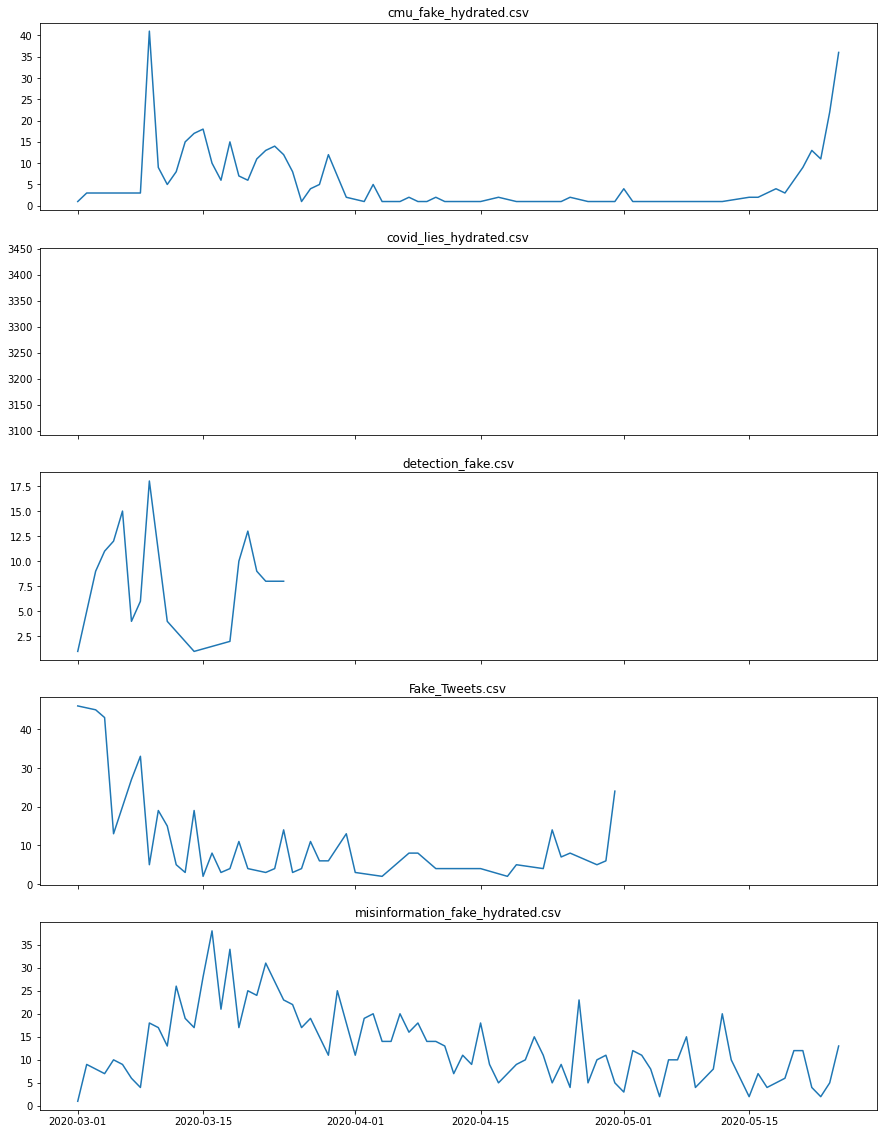

In [51]:
fig, axes = plt.subplots(5, 1, figsize=[15, 20], sharex=True)

for i in range(0,len(fake)):
    axes[i].plot(dates[i].sort_index())
    axes[i].set_title(fake[i])
